# Swindon Earnings

This script was written to provide easy interpretation of earning statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/earningsandworkinghours/methodologies/annualsurveyofhoursandearningslowpayandannualsurveyofhoursandearningspensionresultsqmi) The link allows an excel file to be downloaded.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *MASTER_FILE* variable.

In [51]:
MASTER_FILE = "2019.csv"

In [52]:
earnings_data = pd.read_csv(MASTER_FILE, delimiter=',')

In [53]:
earnings_data

,AveragesAndPercentiles,Sex,WorkingPattern,HoursAndEarnings,Figure
0,Mean,All,All,Annual pay - Gross,29584.00
1,Mean,All,All,Hourly pay - Gross,16.49
2,Mean,All,All,Paid hours worked - Total,34.50
3,Mean,All,All,Weekly pay - Gross,568.90
4,Mean,All,Full-Time,Annual pay - Gross,34453.00
5,Mean,All,Full-Time,Hourly pay - Gross,17.13
6,Mean,All,Full-Time,Paid hours worked - Total,39.20
7,Mean,All,Full-Time,Weekly pay - Gross,671.20
8,Mean,All,Part-Time,Annual pay - Gross,11675.00
9,Mean,All,Part-Time,Hourly pay - Gross,11.62


## Overview

To begin we look at the differences between earnings and total hours worked for both full-time and part-time employment.

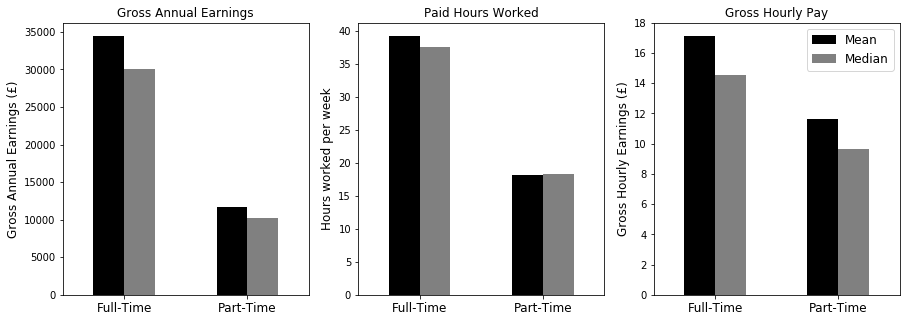

In [91]:
fig, all_axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

colours = ['k', 'grey']
bar_width = 0.5

work_types = ["Full-Time", "Part-Time"]

for idx, item in enumerate(["Annual pay - Gross", "Paid hours worked - Total", "Hourly pay - Gross"]):
    for widx, work_type in enumerate(work_types):
        interested_data = earnings_data.loc[
            (earnings_data['WorkingPattern'] == work_type) & (earnings_data['Sex'] == "All") & (earnings_data['HoursAndEarnings'] == item)
        ]
        
        # Plot the mean
        val = interested_data.loc[interested_data['AveragesAndPercentiles'] == "Mean"][['Figure']].iloc[0][0]
        mn = all_axs[idx].bar(
            ((widx+1)*2)-(bar_width/2),
            val,
            color='k',
            width=bar_width,
            label="Mean"
        )
        
        # Plot the median
        val = interested_data.loc[interested_data['AveragesAndPercentiles'] == "Median"][['Figure']].iloc[0][0]
        me = all_axs[idx].bar(
            ((widx+1)*2)+(bar_width/2),
            val,
            color='grey',
            width=bar_width,
            label="Median"
        )

all_axs[0].set_title("Gross Annual Earnings", fontsize=12)
all_axs[0].set_ylabel("Gross Annual Earnings (£)", fontsize=12)
all_axs[0].set_xticks([2, 4])
all_axs[0].set_xticklabels(work_types, fontsize=12)
all_axs[0].set_xlim(1, 5)

all_axs[1].set_title("Paid Hours Worked", fontsize=12)
all_axs[1].set_ylabel("Hours worked per week", fontsize=12)
all_axs[1].set_xticks([2, 4])
all_axs[1].set_xticklabels(work_types, fontsize=12)
all_axs[1].set_xlim(1, 5)


all_axs[2].set_title("Gross Hourly Pay", fontsize=12)
all_axs[2].set_ylabel("Gross Hourly Earnings (£)", fontsize=12)
all_axs[2].set_xticks([2, 4])
all_axs[2].set_xticklabels(work_types, fontsize=12)
all_axs[2].set_xlim(1, 5)

all_axs[2].legend([mn, me], ["Mean", "Median"], fontsize=12)